In [1]:
#Import necessary libraries

# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Similarity - importing cosine similarity even though I won't use it for this project
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
#Read movie lens small dataset, ratings.csv and movies.csv
# See how many unique users, movies and ratings

# Read in data
ratings=pd.read_csv('ml-latest-small/ratings.csv')

# Take a look at the data
ratings.head()

# Get the dataset information
ratings.info()

# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

# Read in data
movies = pd.read_csv('ml-latest-small/movies.csv')

# Take a look at the data
movies.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
The ratings dataset has 610 unique users
The ratings dataset has 9724 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='movieId', how='inner')

# Add a 'main_genre' column to the merged dataframe by extracting the first genre
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0])

# Take a look at the data
df.head()

,userId,movieId,rating,timestamp,title,genres,main_genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,Comedy
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,Action
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Mystery
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,Crime


In [4]:
#Exploratory data analysis and removing movies with <100 ratings. 

# Aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()

# Keep the movies with over 100 ratings
agg_ratings_over100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_over100.info() 

# Check most popular movies by number of ratings
agg_ratings_over100.sort_values(by='number_of_ratings', ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278


C:\Users\AmarL\AppData\Local\Temp\ipykernel_740\1094018599.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='main_genre', data=genre_mean_rating_sorted, palette='coolwarm')


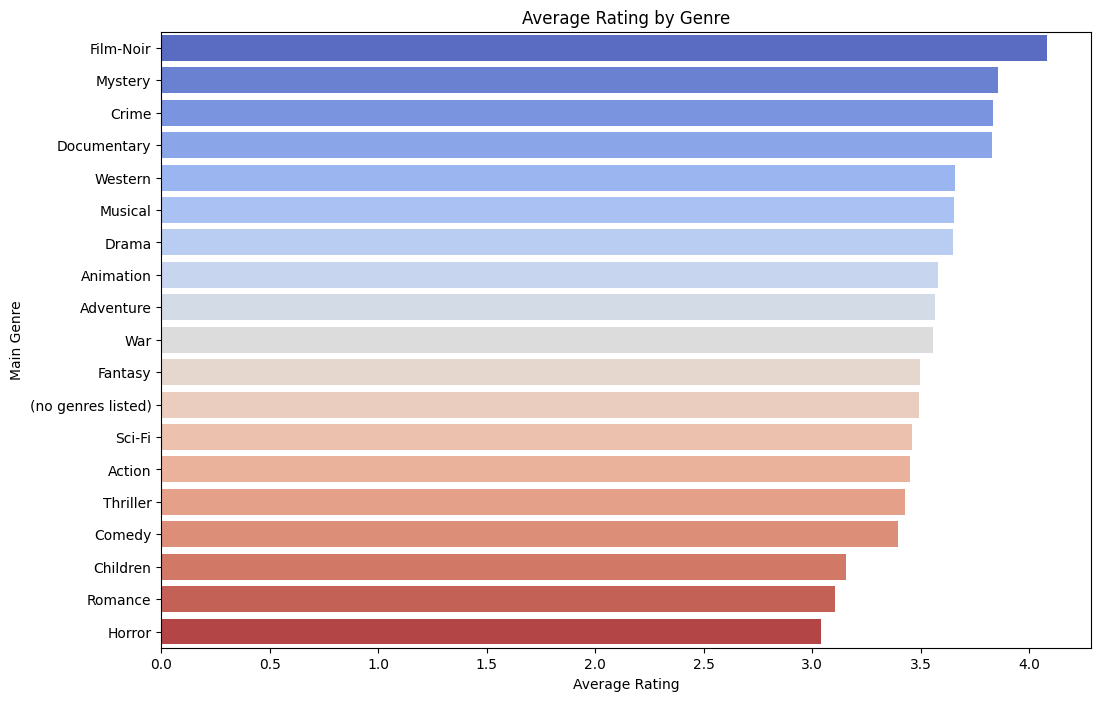

In [5]:
# Visualisation
# Calculate mean rating for each main_genre
genre_mean_rating = df.groupby('main_genre')['rating'].mean().reset_index()

# Sorting the genres by their mean rating for better visualisation
genre_mean_rating_sorted = genre_mean_rating.sort_values('rating', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='main_genre', data=genre_mean_rating_sorted, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Main Genre')
plt.title('Average Rating by Genre')
plt.show()

In [6]:
# Merge data
df_over100 = pd.merge(df, agg_ratings_over100[['title']], on='title', how='inner')
df_over100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      19788 non-null  int64  
 1   movieId     19788 non-null  int64  
 2   rating      19788 non-null  float64
 3   timestamp   19788 non-null  int64  
 4   title       19788 non-null  object 
 5   genres      19788 non-null  object 
 6   main_genre  19788 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [7]:
# Number of users
print('The ratings dataset has', df_over100['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', df_over100['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', df_over100['rating'].nunique(), 'unique ratings')

The ratings dataset has 597 unique users
The ratings dataset has 134 unique movies
The ratings dataset has 10 unique ratings


In [8]:
# Create user-item matrix
matrix = df_over100.pivot_table(index='title', columns='userId', values='rating')
matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,NaN,3.0,NaN,4.5
Ace Ventura: Pet Detective (1994),NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.5,NaN,3.0
Aladdin (1992),NaN,NaN,NaN,4.0,4.0,5.0,3.0,NaN,NaN,4.0,...,NaN,NaN,NaN,3.0,3.5,NaN,NaN,3.0,NaN,NaN
Alien (1979),4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,4.0,3.0,4.0,NaN,4.5
Aliens (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.5,NaN,5.0


In [9]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,0.105505,NaN,NaN,NaN,...,NaN,NaN,1.105505,NaN,NaN,1.105505,NaN,-0.894495,NaN,0.605505
Ace Ventura: Pet Detective (1994),NaN,NaN,NaN,NaN,-0.040373,-0.040373,NaN,NaN,NaN,NaN,...,NaN,-1.040373,NaN,-1.040373,NaN,NaN,NaN,0.459627,NaN,-0.040373
Aladdin (1992),NaN,NaN,NaN,0.20765,0.207650,1.207650,-0.792350,NaN,NaN,0.20765,...,NaN,NaN,NaN,-0.792350,-0.29235,NaN,NaN,-0.792350,NaN,NaN
Alien (1979),0.030822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.030822,NaN,NaN,0.030822,-0.969178,0.030822,NaN,0.530822
Aliens (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.035714,NaN,NaN,-0.464286,NaN,0.535714,NaN,1.035714


In [10]:
# Item similarity matrix using Pearson correlation - Can use cosine similarity aswell.
item_similarity = matrix_norm.T.corr()
item_similarity.head()


title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),1.000000,-0.036319,0.017446,0.318523,0.317386,0.324150,0.193592,0.152405,0.011490,0.478877,...,-0.108291,-0.012451,-0.041791,-0.458642,0.152271,0.245279,0.100172,-0.447306,0.087803,-0.123862
Ace Ventura: Pet Detective (1994),-0.036319,1.000000,0.302193,-0.208017,-0.107524,-0.030425,0.040435,0.065549,0.173855,0.245829,...,0.139896,0.188089,0.054408,0.176930,-0.007853,-0.061520,0.170717,0.176155,0.051239,0.045676
Aladdin (1992),0.017446,0.302193,1.000000,0.026514,0.151152,0.445204,0.127764,0.262014,0.367076,0.015038,...,0.333687,0.562311,-0.069176,0.137215,0.171330,0.153934,0.272375,0.065342,0.164459,0.285480
Alien (1979),0.318523,-0.208017,0.026514,1.000000,0.705925,0.387215,0.215751,0.035373,-0.006804,0.378709,...,0.199538,0.178620,0.108327,0.022007,-0.098813,0.350428,0.270697,0.119849,0.117749,0.030257
Aliens (1986),0.317386,-0.107524,0.151152,0.705925,1.000000,0.540458,0.111452,0.139326,0.076674,0.221920,...,0.369971,0.287243,0.084792,0.092412,0.195581,0.296933,0.294852,-0.014274,0.111864,0.225923


In [11]:
# Predict User's Rating For One Movie

# Pick a user ID
picked_userid = 1

# Pick a movie
picked_movie = 'Toy Story (1995)'

# Movies that the target user has watched
picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={1:'rating'})

picked_userid_watched.head()

# Similarity score of the movie Toy Story with all the other movies
picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={'Toy Story (1995)':'similarity_score'})

# Rank the similarities between the movies user 1 rated and Toy Story. Adjust n value to see more movie similarity scores.
n = 5
picked_userid_watched_similarity = pd.merge(left=picked_userid_watched, 
                                            right=picked_movie_similarity_score, 
                                            on='title', 
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False)[:n]

# Take a look at the User 1 watched movies with highest similarity
picked_userid_watched_similarity

,title,rating,similarity_score
38,Toy Story (1995),0.079070,1.000000
49,Mrs. Doubtfire (1993),-0.388889,0.446261
3,E.T. the Extra-Terrestrial (1982),1.233607,0.409216
4,Ghostbusters (a.k.a. Ghost Busters) (1984),1.225000,0.404487
12,Back to the Future (1985),0.961988,0.368229


In [12]:
# Calculate the predicted rating using weighted average of similarity scores and the ratings from user 1
predicted_rating = round(np.average(picked_userid_watched_similarity['rating'], 
                                    weights=picked_userid_watched_similarity['similarity_score']), 6)

print(f'The predicted rating for {picked_movie} by user {picked_userid} is {predicted_rating}' )



The predicted rating for Toy Story (1995) by user 1 is 0.479441


In [13]:
# Movie recommendation system

# Item-based recommendation function using collaborative filtering
def item_based_rec(picked_userid=1, number_of_similar_items=5, number_of_recommendations =3):
  import operator
  # Movies that the target user has not watched
  picked_userid_unwatched = pd.DataFrame(matrix_norm[picked_userid].isna()).reset_index()
  picked_userid_unwatched = picked_userid_unwatched[picked_userid_unwatched[1]==True]['title'].values.tolist()

  # Movies that the target user has watched
  picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=False))\
                            .reset_index()\
                            .rename(columns={1:'rating'})
  
  # Dictionary to save the unwatched movie and predicted rating pair
  rating_prediction ={}  

  # Loop through unwatched movies          
  for picked_movie in picked_userid_unwatched: 
    # Calculate the similarity score of the picked movie iwth other movies
    picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
    # Rank the similarities between the picked user watched movie and the picked unwatched movie.
    picked_userid_watched_similarity = pd.merge(left=picked_userid_watched, 
                                                right=picked_movie_similarity_score, 
                                                on='title', 
                                                how='inner')\
                                        .sort_values('similarity_score', ascending=False)[:number_of_similar_items]
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from user 1
    predicted_rating = round(np.average(picked_userid_watched_similarity['rating'], 
                                        weights=picked_userid_watched_similarity['similarity_score']), 6)
    # Save the predicted rating in the dictionary
    rating_prediction[picked_movie] = predicted_rating
    # Return the top recommended movies
  return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]


In [14]:
# Get recommendations
recommended_movie = item_based_rec(picked_userid=1, number_of_similar_items=5, number_of_recommendations =3)
recommended_movie


[('Austin Powers: The Spy Who Shagged Me (1999)', 1.096288),
 ('Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', 0.92924),
 ('Lord of the Rings: The Return of the King, The (2003)', 0.926824)]